In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print('### 학습 데이터 정보 ###')
print(titanic_df.info())

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Age, cabin, Embarked column - exist Null value
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값의 개수 : ', titanic_df.isnull().sum())

데이터 세트 Null 값의 개수 :  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
# 문자열 피처 : Sex, Cabin, Embarked
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포 : 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포 : 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [7]:
# Cabin은 뭐 정리가 하나도 안 되어있다. 
# Cabin 데이터에서 선실 등급 나타내는 앞 대문자만 따오기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())


Cabin 값 분포 : 
 Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [44]:
# 성별에 따른 생존자수
# groupby : col의 row화 - row로 묶는다고 생각하면 좋을 듯
# sex로 이분류, 그 두 분류를 각각 survived로 분류

# 0은 사망, 1은 생존
x = titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
print(type(x))
print(x)

print('남성의 생존율 : ', x['male', 1]/x['male'].sum())
print('여성의 생존율 : ', x['female', 1]/x['female'].sum())
print('\n')



<class 'pandas.core.series.Series'>
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
남성의 생존율 :  0.18890814558058924
여성의 생존율 :  0.7420382165605095




<Axes: xlabel='Sex', ylabel='Survived'>

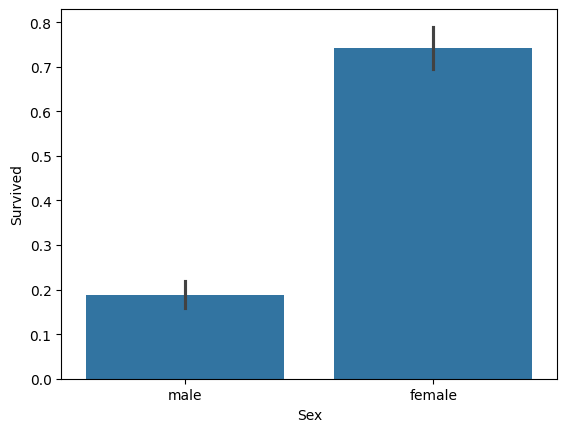

In [19]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

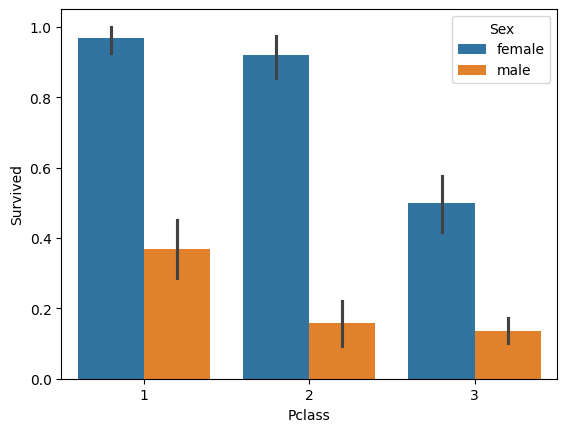

In [45]:
# 부자와 빈자
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

In [ ]:
# page 137